<h3> Regresja liniowa - ciąg dalszy

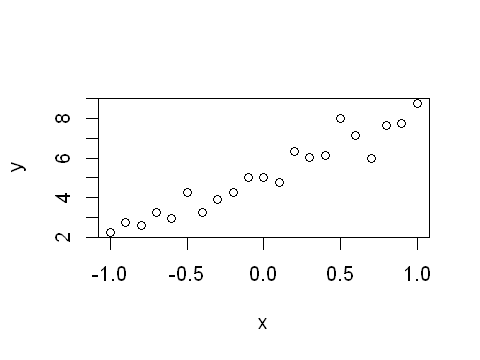

In [9]:
x = seq(-1,1,by=0.1)
y = 3*x+5+rnorm(length(x), 0, 0.5)

options(repr.plot.width=4, repr.plot.height=3)
plot(x,y)

In [10]:
n = length(x) #liczba danych
n

[1] 21

Cel: znalezienie zależności $y = ax+b$

In [11]:
#Jak znaleźć współczynniki a i b?
a = cor(x,y)*sd(y)/sd(x)
b = mean(y - a*x)
a; b

[1] 3.038905

[1] 5.144454

In [12]:
#R^2 - czyli wspolczynnik oceny stworzonego modelu

y_pred = a*x+b #przewidywane y
SSR = sum((y_pred-mean(y))^2)
SST = sum((y-mean(y))^2)
R2 = SSR/SST
R2

[1] 0.9209127

W R wystarczy wykonać komendę: 

In [13]:
model = lm(y~x) 
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30397 -0.27850 -0.02208  0.26988  1.33151 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1445     0.1237   41.58  < 2e-16 ***
x             3.0389     0.2043   14.87 6.38e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5669 on 19 degrees of freedom
Multiple R-squared:  0.9209,	Adjusted R-squared:  0.9168 
F-statistic: 221.2 on 1 and 19 DF,  p-value: 6.383e-12


Pytanie: Czy wartości $y_{pred}$ z modelu przypominają rzeczywsite $y$? Liczymy $y-y_{pred} =: \epsilon$

In [14]:
ei = y - y_pred #wartosci resztowe (rezidua); powinny mieć średnią 0 i pochodzić z rozkładu normalnego (wtedy można stosować różnego rodzjau testy)

In [15]:
mean(ei)

[1] 3.806479e-16

<h4> Zadanie1: Dlaczego w modelu $y=ax+b + \epsilon$ możemy założyć, że $\epsilon$ ma wartość oczekiwaną 0?

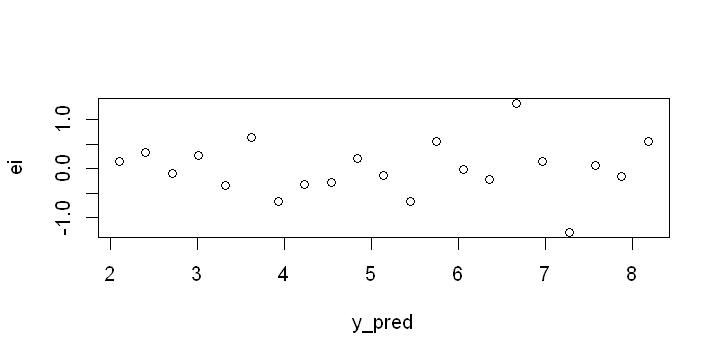

In [16]:
options(repr.plot.width=6, repr.plot.height=3)
plot(y_pred, ei) #zaleznosc reszt od warrtosci przewidzianych

In [17]:
shapiro.test(ei)


	Shapiro-Wilk normality test

data:  ei
W = 0.97306, p-value = 0.7994


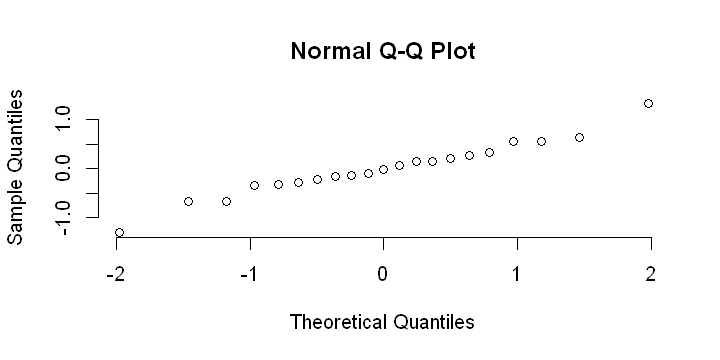

In [18]:
qqnorm(ei, pch = 1, frame = FALSE)

In [19]:
Su = sqrt(sum(ei^2)/(n-2)) #odchylenie standardowe składnika resztowego (Residual standard error)
print(Su)

[1] 0.5669307


Dźwignia: $h_i = \frac{1}{n}+\frac{(x_i-\overline{x})^2}{\sum_j (x_j-\overline{x})^2}$

In [20]:
dzwignia = 1/n + (x-mean(x))^2/sum((x-mean(x))^2)

In [21]:
Sei = Su*sqrt(1 - (dzwignia)) #blędy standardowe kolejnych reziduum

In [22]:
ri = ei/Sei #standaryzowane reszty

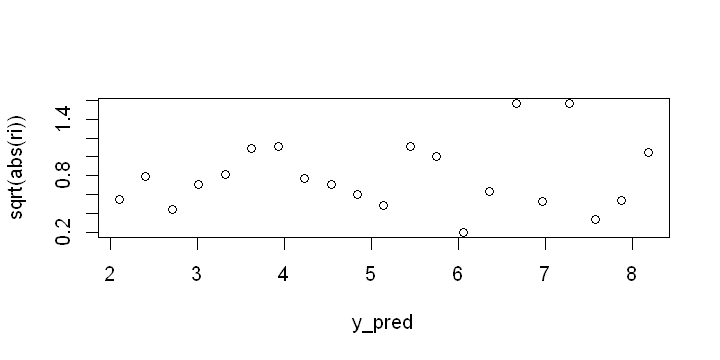

In [23]:
plot(y_pred, sqrt(abs(ri))) #zaleznosc pieriwastkow ze standarzyowanych reszt od y_pred

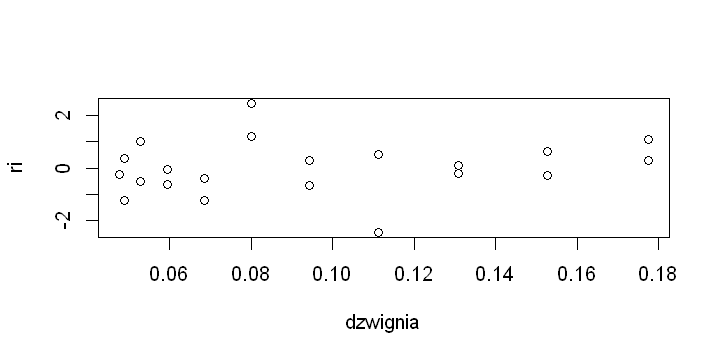

In [24]:
plot(dzwignia, ri)

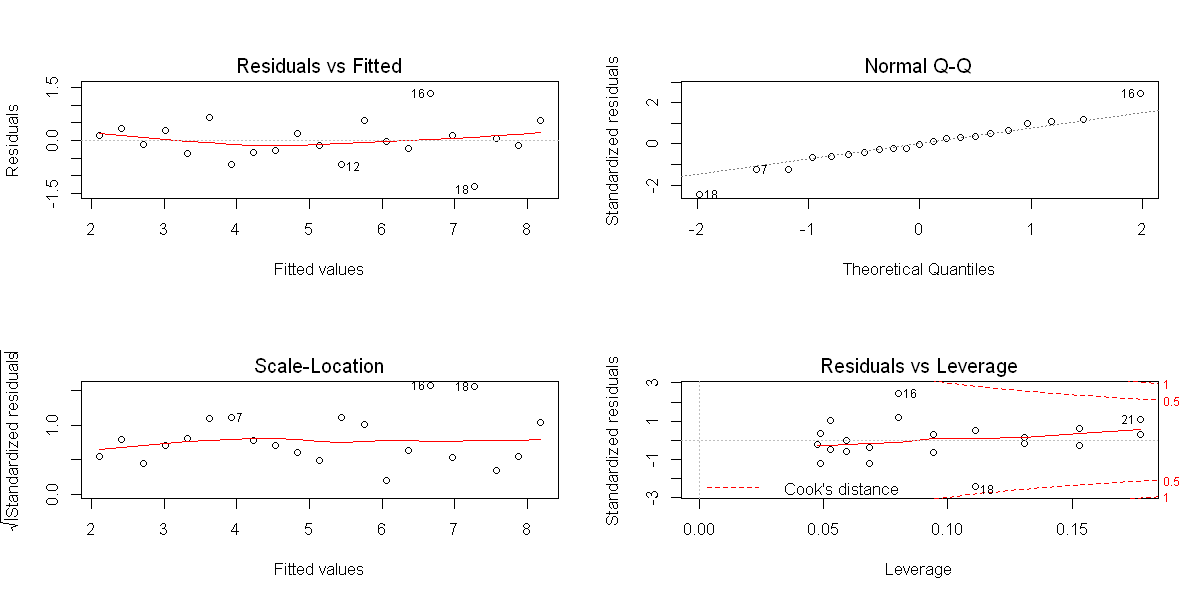

In [25]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(2, 2));
plot(model) #wsystkie wykresy co wyzej mozna zrealizowac za pomocą komendy

<h4> Obserwacje odstające i wpływowe

- obserwacje odstające - te które mają duże reszty,
- obserwacje wpływowe - te, których usunięcie prowadzi do znacząco różnych oszacowanych parametrów

Chociaż często używamy tych pojęć zamiennie, należy zwrócić uwagę że nie są one tożsame!

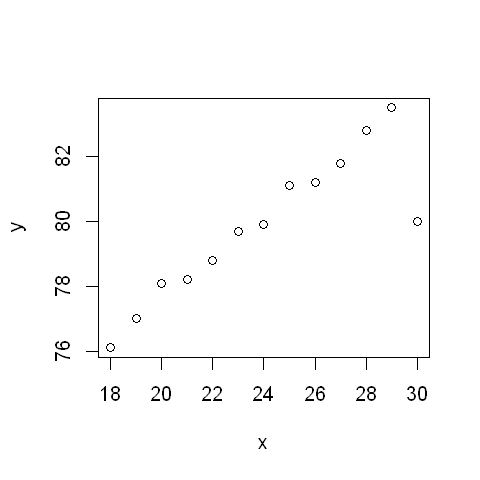

In [26]:
x = c(18,19,20,21,22,23,24,25,26,27,28,29,30)
y = c(76.1,77,78.1,78.2,78.8,79.7,79.9,81.1,81.2,81.8,82.8,83.5,80)

options(repr.plot.width=4, repr.plot.height=4)
plot(x,y)

In [27]:
cor(x,y)

[1] 0.8899893

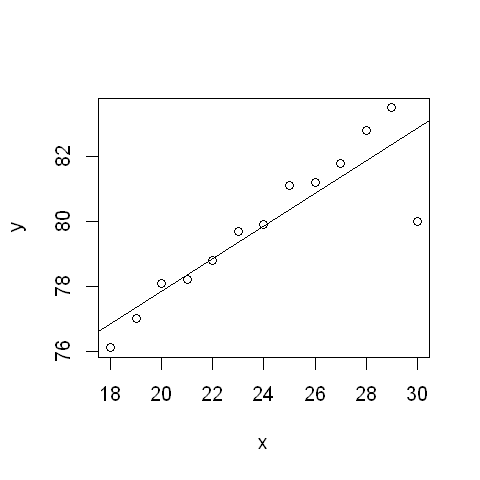

In [28]:
model = lm(y~x)
plot(x,y)
abline(model)

In [29]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8846 -0.1500  0.2539  0.4269  1.1192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 67.76923    1.89056  35.846 9.58e-13 ***
x            0.50385    0.07783   6.473 4.59e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.05 on 11 degrees of freedom
Multiple R-squared:  0.7921,	Adjusted R-squared:  0.7732 
F-statistic: 41.91 on 1 and 11 DF,  p-value: 4.592e-05


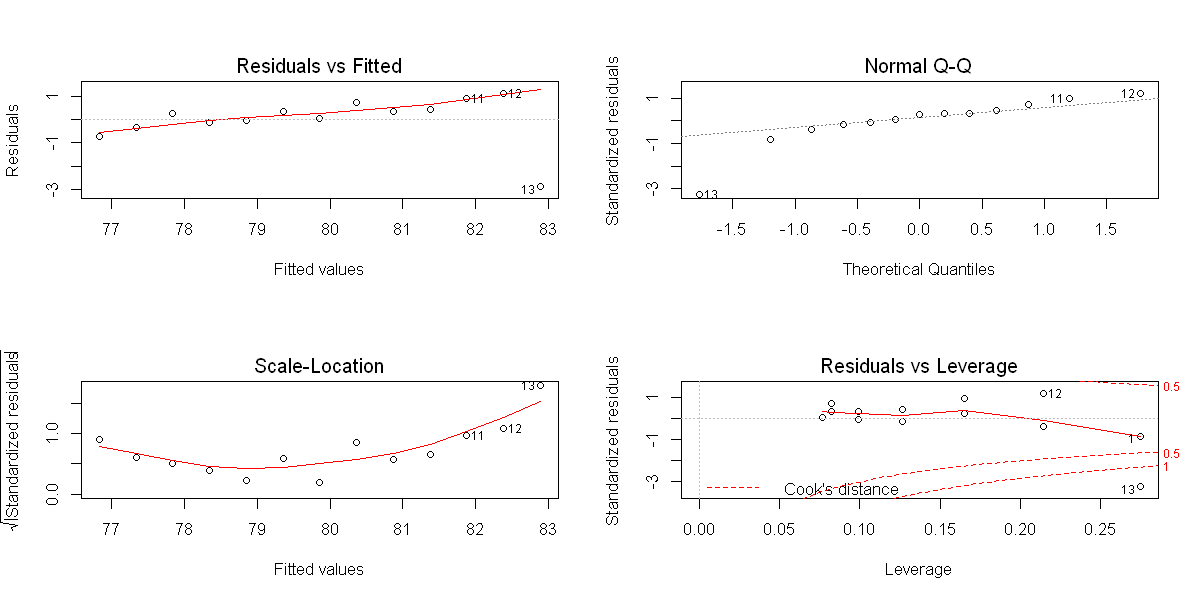

In [30]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(2, 2));
plot(model)

In [31]:
n = length(x)
y_pred = 0.50385*x+67.76923
ei = y - y_pred 
Su = sqrt(sum(ei^2)/(n-2))
dzwignia = 1/n + (x-mean(x))^2/sum((x-mean(x))^2)
Sei = Su*sqrt(1 - (dzwignia))
ri = ei/Sei

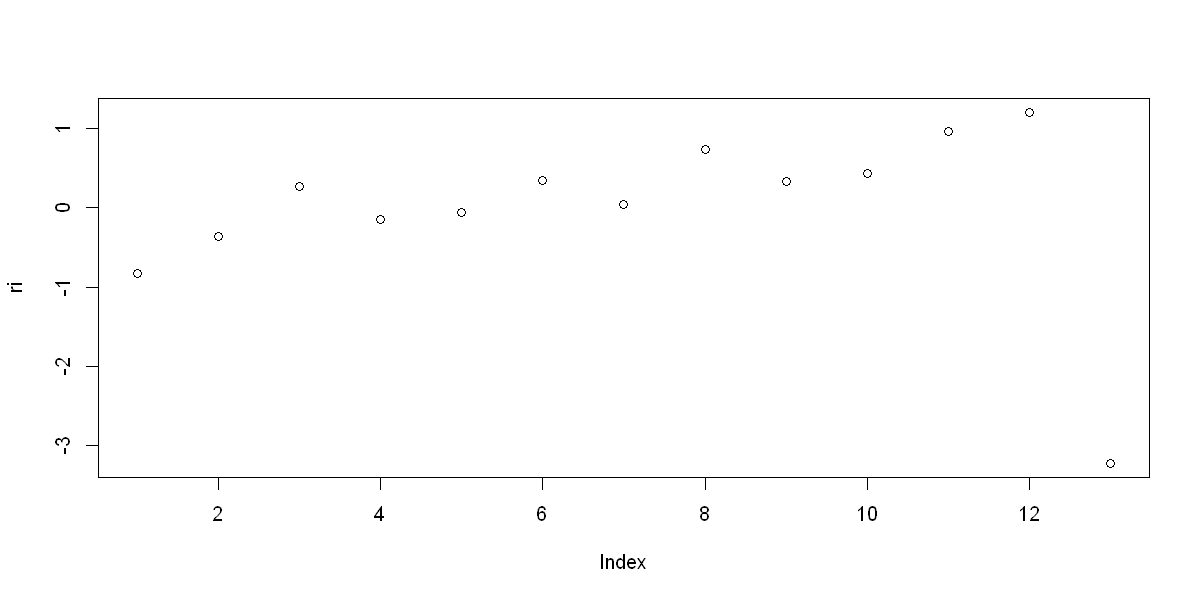

In [32]:
plot(ri) #wykres standaryzowanych reszt

Metoda 1

In [33]:
#bezposrednio
t = ri*sqrt((n-1-2)/(n-1-1-ri^2)) #studentyzowana reszta; ma rozkład t-studenta (same standaryzowane reszty nie mają "ladnego rozkladu")
t

[1]  -0.81305726  -0.35291320   0.25295497  -0.14595739  -0.05159481
 [6]   0.32612508   0.03626648   0.71379967   0.31790410   0.41826543
[11]   0.95825738   1.23011613 -13.24273385

In [34]:
#zaimplementowana w R
jack = rstudent(model) #pozwala znajdywac obserwacje odstajace
jack

1            2            3            4            5            6 
 -0.81297691  -0.35283774   0.25303137  -0.14587942  -0.05151457   0.32620954 
           7            8            9           10           11           12 
  0.03635301   0.71389709   0.31800047   0.41836822   0.95837859   1.23025632 
          13 
-13.23299179

In [35]:
jack[which.max(abs(jack))] #gdzie najwieksza wartosc?

13 
-13.23299

In [37]:
library(car)
outlierTest(model)

    rstudent unadjusted p-value Bonferroni p
13 -13.23299         1.1586e-07   1.5062e-06

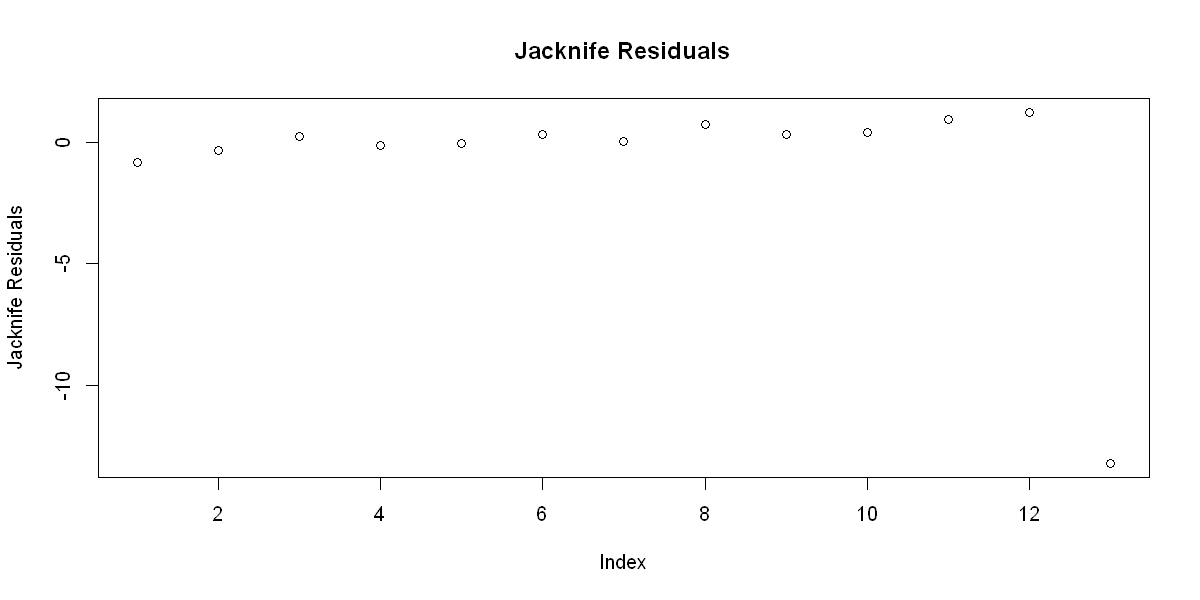

In [38]:
plot(jack, ylab="Jacknife Residuals", main="Jacknife Residuals")

Metoda 2

In [39]:
cutoff = 4/(n-length(model$coefficients)-2) #graniczny poziom  4/(n-k-2)

print(cutoff)

[1] 0.4444444


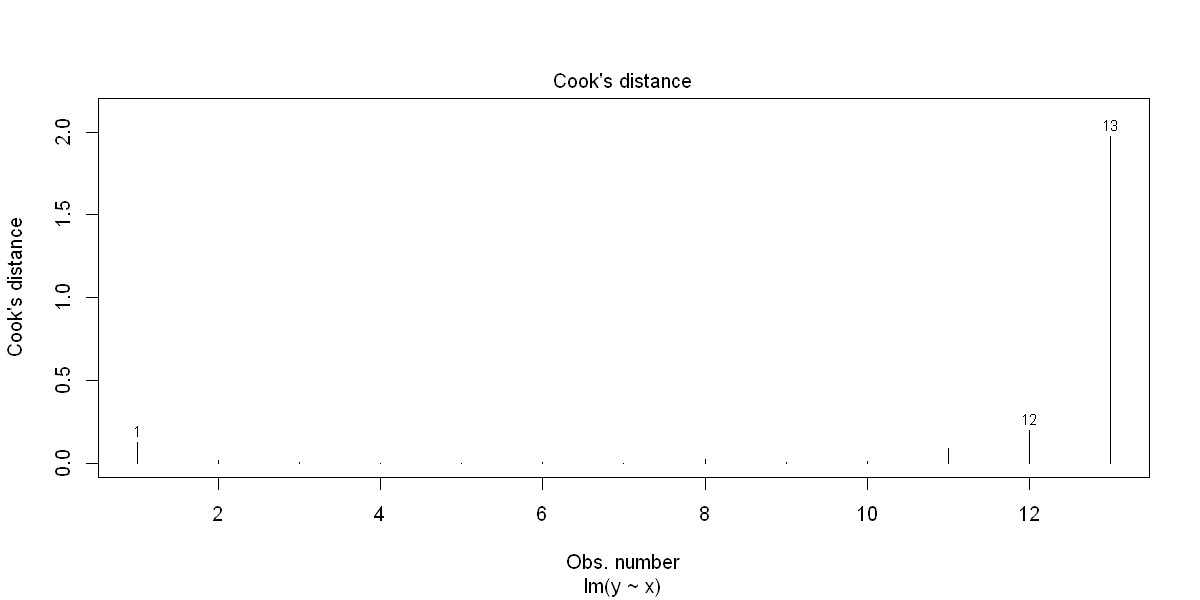

In [40]:
plot(model, which=4, cook.levels=cutoff) #odleglosc cooka, mierzy jak usunięcie danej obserwacji wplywa na wspolczynniki modelu (dokladniej na y_pred), jest proporcjonalna do (y_predALL - y_pred)^2, jak wysoka to obserwacja jest wplywowa

,StudRes,Hat,CookD
1,-0.8129769,0.2747253,0.1291576
12,1.2302563,0.2142857,0.1971850
13,-13.2329918,0.2747253,1.9707889


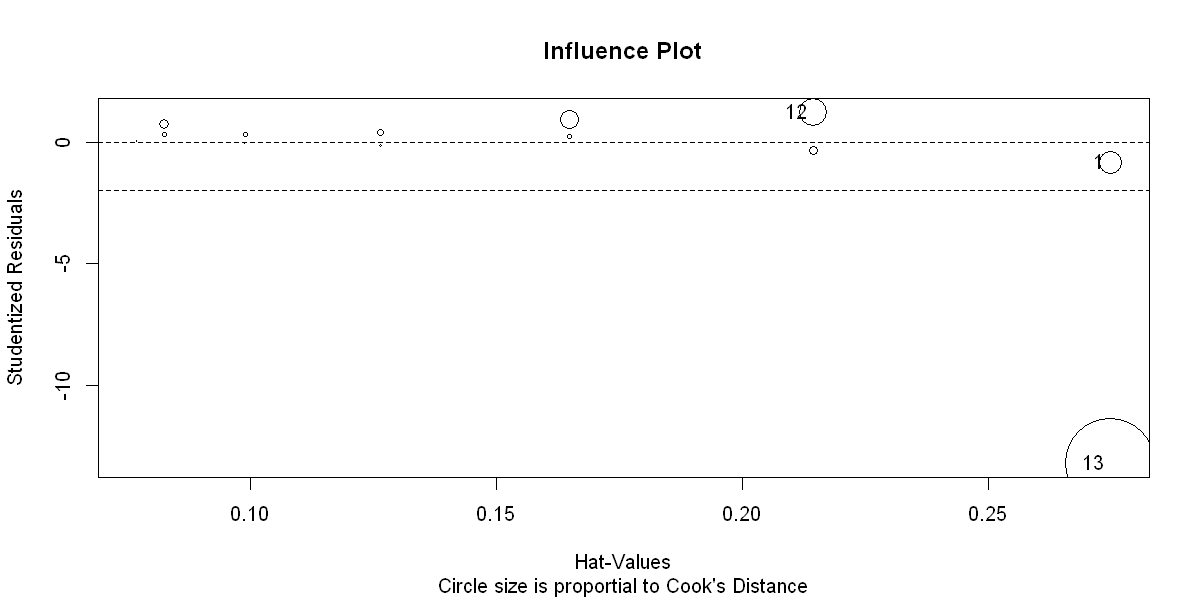

In [41]:
influencePlot(model, main="Influence Plot",sub="Circle size is proportial to Cook's Distance") #wymaga "car"

Metoda 3

In [42]:
influence.measures(model) #to co wczesniej + pare innych rzeczy

Influence measures of
	 lm(formula = y ~ x) :

     dfb.1_    dfb.x   dffit   cov.r   cook.d    hat inf
1  -0.46028  0.42456 -0.5004 1.46789 1.29e-01 0.2747    
2  -0.16277  0.14753 -0.1843 1.50236 1.84e-02 0.2143    
3   0.09294 -0.08209  0.1124 1.43044 6.91e-03 0.1648    
4  -0.04096  0.03471 -0.0555 1.37916 1.69e-03 0.1264    
5  -0.01027  0.00805 -0.0171 1.34209 1.60e-04 0.0989    
6   0.03949 -0.02524  0.0978 1.29106 5.20e-03 0.0824    
7   0.00162  0.00000  0.0105 1.31049 6.06e-05 0.0769    
8  -0.02274  0.05524  0.2140 1.19389 2.40e-02 0.0824    
9  -0.03476  0.04966  0.1054 1.31605 6.04e-03 0.0989    
10 -0.07922  0.09954  0.1591 1.33779 1.37e-02 0.1264    
11 -0.26242  0.31094  0.4258 1.21531 9.13e-02 0.1648    
12 -0.44896  0.51440  0.6425 1.16173 1.97e-01 0.2143    
13  6.16437 -6.91070 -8.1443 0.00487 1.97e+00 0.2747   *

In [43]:
lm.influence(lm(model)) #mozna poczytac wiecej tutaj: https://docs.tibco.com/pub/enterprise-runtime-for-R/4.3.0/doc/html/Language_Reference/stats/lm.influence.html

(Intercept),x
-0.883916084,3.356643e-02
-0.320763852,1.196880e-02
0.183704453,-6.680162e-03
-0.081132075,2.830189e-03
-0.020356473,6.566604e-04
0.077890373,-2.049747e-03
0.003205128,1.285863e-19
-0.043988945,4.398895e-03
-0.068574109,4.033771e-03
-0.155732946,8.055152e-03


<h4> Robust LM

In [44]:
library(MASS)
summary(rr.huber <- rlm(y ~ x )) #porownac wsp ze standardową regresją 


Call: rlm(formula = y ~ x)
Residuals:
     Min       1Q   Median       3Q      Max 
-3.81423 -0.16761 -0.07439  0.21685  0.44115 

Coefficients:
            Value    Std. Error t value 
(Intercept)  65.3481   0.6286   103.9525
x             0.6155   0.0259    23.7839

Residual standard error: 0.3214 on 11 degrees of freedom

<h4> Zadanie2: Zbuduj model regresji liniowej. Poszukujemy zależności wartości odżywczych płatków (rating) od zawartości cukrów (sugars). Dodatkowo:

- oblicz i zinterpretuj współczynnik korelacji,
- zbuduj model liniowy, skomentuj otrzymane parametry oraz dokonaj wstępęj diagnostyki modelu,
- jaka będzie przewidywana wartość płatków z zerową wartością odżywczą?
- o ile wzrośnie lub zmaleje wartość odżywcza płatków jeżeli zawartość cukrów wzrośnie o 1 gram?
- wyznacz obserwacje nietypowe

In [2]:
library(liver)
data(cereal)
head(cereal)

name,manuf,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple Cinnamon Cheerios,G,cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


<h4> Nieliniowe zależności

<h4> Zadanie3: Na poprzednich zajęciach rozmawialiśmy o transformacjach danych (m.in. logarytm czy pierwiastek). Zapoznaj się z szerszą klasą takich przekształceń (https://core.ac.uk/download/pdf/239584602.pdf); w szczególności strony 1-4. Jakie cechy mają te transformacje? Sporządź zwięzłą notatkę na ten temat.


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-36682 -29267  -8247  23608  84749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -83749.9    12787.4  -6.549 1.01e-07 ***
x            11346.2      913.7  12.418 6.00e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33350 on 38 degrees of freedom
Multiple R-squared:  0.8023,	Adjusted R-squared:  0.7971 
F-statistic: 154.2 on 1 and 38 DF,  p-value: 6.004e-15


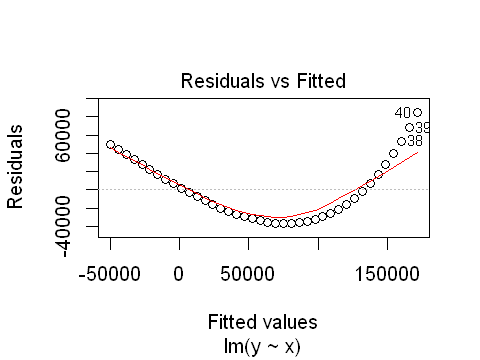

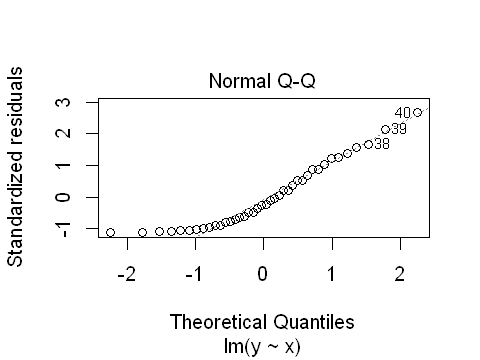

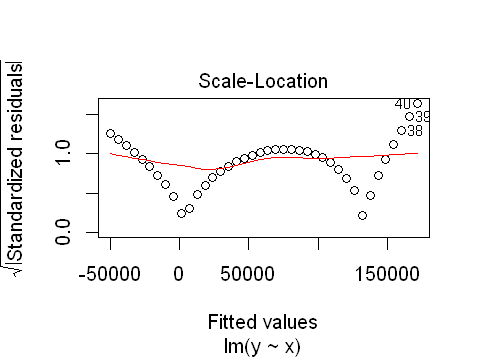

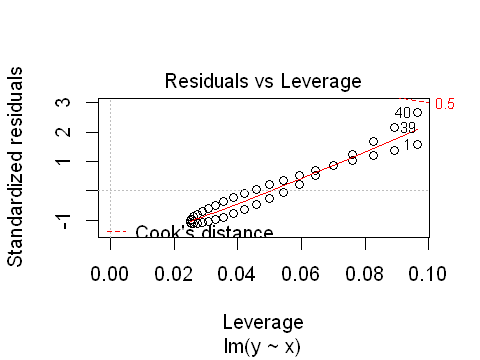

[1] 0.2626263


Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32883 -0.26789 -0.08546  0.21448  0.73256 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.072444   0.118179  -51.38   <2e-16 ***
x            4.532953   0.008444  536.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3082 on 38 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 2.882e+05 on 1 and 38 DF,  p-value: < 2.2e-16


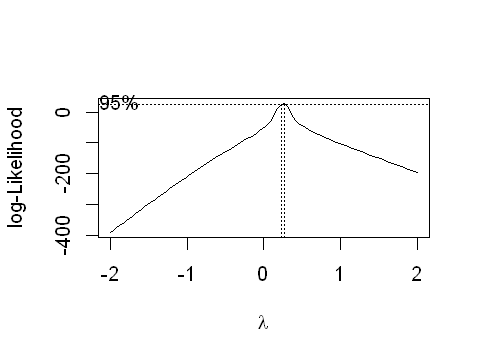

In [83]:
library(MASS)

x = seq(3, 22.5, by = 0.5)
y = x^4 + rnorm(40) 

model <- lm(y~x) #buduje model liniowy
summary(model)
plot(model)

#szukam odpowiedniej transformacji (potęgi)
bc <- boxcox(y ~ x)
(lambda <- bc$x[which.max(bc$y)])

new_model <- lm(((y^lambda-1)/lambda) ~ x)
summary(new_model)

<h4> Zamiast dokonywać transformacji można też tak:

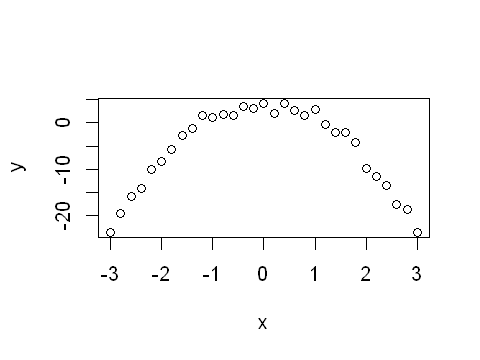

In [86]:
x = seq(-3, 3, by=0.2)
y = -3*x^2 + 4+ rnorm(length(x))

options(repr.plot.width=4, repr.plot.height=3)
plot(x,y)

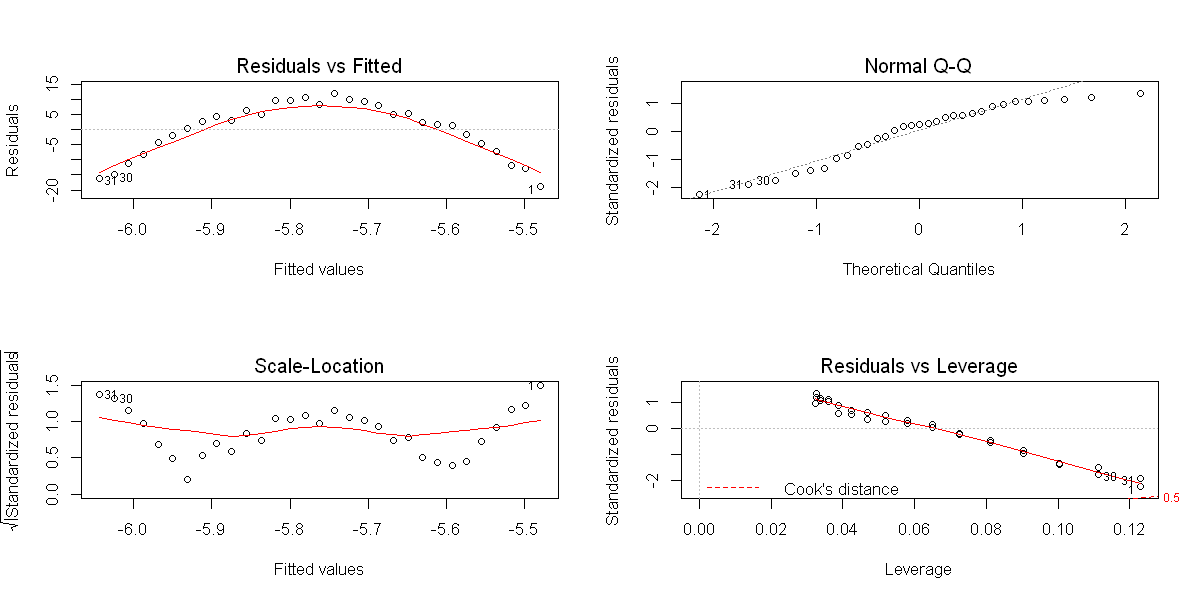

In [30]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(2, 2));
plot(lm(y~x))

In [31]:
summary(lm(y~I(x^2)))


Call:
lm(formula = y ~ I(x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8756 -0.8381  0.2377  0.8102  2.3787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.90384    0.32704   11.94 1.03e-12 ***
I(x^2)      -3.02052    0.07623  -39.62  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.213 on 29 degrees of freedom
Multiple R-squared:  0.9819,	Adjusted R-squared:  0.9812 
F-statistic:  1570 on 1 and 29 DF,  p-value: < 2.2e-16


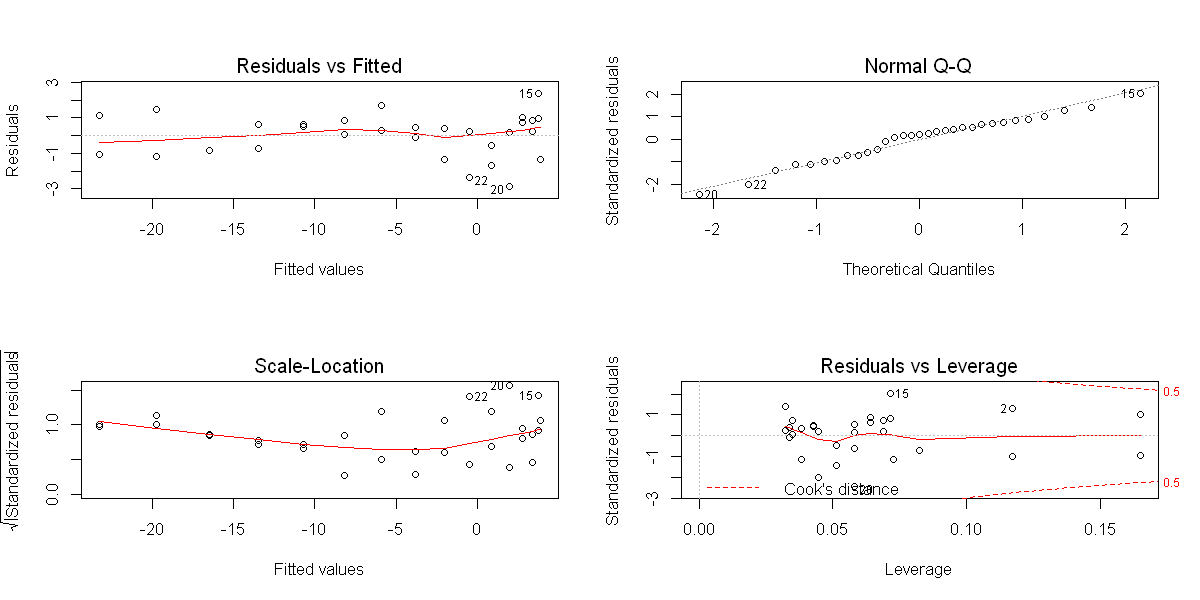

In [32]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(2, 2));
plot(lm(y~I(x^2)))